In [1]:
import pandas as pd

# URL for the Phishing Websites dataset
data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00327/Training%20Dataset.arff'

# Load the dataset using pandas
data = pd.read_csv(data_url, comment='@', header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Splitting the dataset into features and target variable
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train.shape, X_test.shape

((8844, 30), (2211, 30))

In [6]:
# Check for symmetry using a different approach
matrix = pd.DataFrame(X_train)
difference = (matrix - matrix.transpose()).values
is_symmetric = not difference.any()
is_symmetric

False

In [8]:
import numpy as np

# Formulate the linear system using Normal Equations
X_transpose = np.transpose(X_train)
A = np.dot(X_transpose, X_train)
b = np.dot(X_transpose, y_train)

A.shape, b.shape

((30, 30), (30,))

In [9]:
from scipy.linalg import lu_solve, lu_factor

# Solve the linear system using LU Decomposition
lu, piv = lu_factor(A)
x_lu = lu_solve((lu, piv), b)

x_lu

array([ 0.08674648, -0.02072878, -0.09850292,  0.04033006,  0.05013387,
        0.07914121,  0.07130054,  0.383719  , -0.01078052, -0.03649453,
        0.04491168, -0.0365236 ,  0.05754277,  0.34534096,  0.0924595 ,
        0.09362824, -0.02348268, -0.03532555, -0.04933197,  0.02119763,
        0.00713291, -0.00264326, -0.02663917, -0.0014569 ,  0.06528269,
        0.09373292,  0.03594003,  0.06949297,  0.07333871,  0.04423518])

In [10]:
from scipy.sparse.linalg import cg

# Solve the linear system using Conjugate Gradient method
x_cg, info = cg(A, b)
x_cg, info

(array([ 0.08674363, -0.02072915, -0.09850826,  0.04033562,  0.05014138,
         0.0791428 ,  0.07129732,  0.38372002, -0.01077829, -0.03649649,
         0.04489906, -0.03651413,  0.05754627,  0.34534067,  0.09245839,
         0.09362699, -0.02347504, -0.03533291, -0.04932787,  0.02120446,
         0.00713508, -0.00264413, -0.0266439 , -0.00145693,  0.06527862,
         0.09373166,  0.03594313,  0.06949274,  0.07333394,  0.04424061]),
 0)

In [11]:
from scipy.linalg import svd

# Compute the SVD of the feature matrix
U, singular_values, Vt = svd(X_train)

singular_values

array([218.1703158 , 189.73957892, 152.68928897, 118.27140271,
       112.49040533, 101.9195188 , 100.64608008,  98.94878553,
        96.53349933,  90.98470124,  90.59542019,  88.71397743,
        87.98487627,  85.46038872,  84.18316985,  76.78248994,
        72.54694355,  70.60679273,  62.46770245,  61.04807528,
        59.23838382,  57.42522154,  53.76121758,  51.99373497,
        49.92317699,  46.18021001,  43.82938313,  37.010083  ,
        33.14363292,  21.50268348])

In [12]:
# Compute the principal components using SVD results
num_components = 10  # Number of principal components to retain
principal_components = Vt[:num_components, :]

# Project the data onto the principal components
X_pca = np.dot(X_train, principal_components.T)

X_pca.shape

(8844, 10)

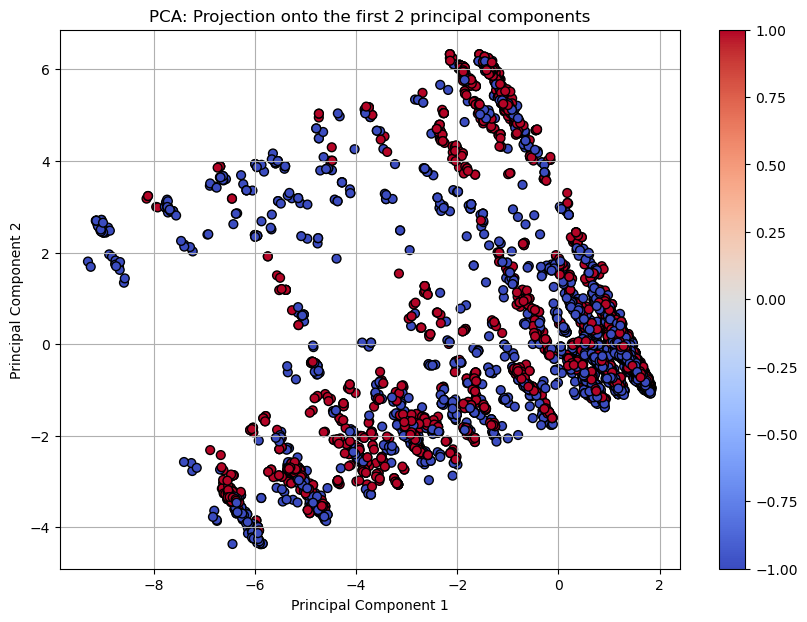

In [13]:
import matplotlib.pyplot as plt

# Visualize the data projected onto the first two principal components
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap='coolwarm', edgecolor='k', s=40)
plt.colorbar()
plt.title('PCA: Projection onto the first 2 principal components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

In [14]:
from scipy.linalg import lstsq

# Compute the least squares solution
beta_least_squares, residuals, rank, singular_values = lstsq(X_train, y_train)

beta_least_squares

array([ 0.08674648, -0.02072878, -0.09850292,  0.04033006,  0.05013387,
        0.07914121,  0.07130054,  0.383719  , -0.01078052, -0.03649453,
        0.04491168, -0.0365236 ,  0.05754277,  0.34534096,  0.0924595 ,
        0.09362824, -0.02348268, -0.03532555, -0.04933197,  0.02119763,
        0.00713291, -0.00264326, -0.02663917, -0.0014569 ,  0.06528269,
        0.09373292,  0.03594003,  0.06949297,  0.07333871,  0.04423518])

In [15]:
from sklearn.metrics import mean_squared_error, accuracy_score

# Make predictions on the test set
y_pred = np.dot(X_test, beta_least_squares)
# Convert continuous predictions to binary class labels
y_pred_class = np.where(y_pred > 0, 1, -1)

# Compute the Mean Squared Error and accuracy
mse = mean_squared_error(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred_class)

mse, accuracy

(0.3078719115204195, 0.9185888738127544)

In [17]:
from sklearn.decomposition import TruncatedSVD

# Apply Truncated SVD decomposition
num_components = 5  # Number of components to retain
svd = TruncatedSVD(n_components=num_components, random_state=42)
X_svd = svd.fit_transform(X_train)

X_svd.shape

(8844, 5)

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Train a logistic regression model
logreg = LogisticRegression(random_state=42, max_iter=1000)
logreg.fit(X_train, y_train)

# Predict on the test set
y_pred_logreg = logreg.predict(X_test)

# Evaluate the performance
classification_report_logreg = classification_report(y_test, y_pred_logreg)
classification_report_logreg

'              precision    recall  f1-score   support\n\n          -1       0.92      0.90      0.91       956\n           1       0.93      0.94      0.93      1255\n\n    accuracy                           0.92      2211\n   macro avg       0.92      0.92      0.92      2211\nweighted avg       0.92      0.92      0.92      2211\n'

In [19]:
from scipy.sparse import csr_matrix

# Convert the dataset into a Compressed Sparse Row (CSR) format
X_train_sparse = csr_matrix(X_train)
X_test_sparse = csr_matrix(X_test)

X_train_sparse.shape, X_train_sparse.nnz

((8844, 30), 265320)

In [20]:
from sklearn.utils.extmath import randomized_svd

# Compute randomized SVD
num_components_rand = 5  # Number of components to retain
U_rand, Sigma_rand, VT_rand = randomized_svd(X_train, n_components=num_components_rand, random_state=42)

U_rand.shape, Sigma_rand.shape, VT_rand.shape

((8844, 5), (5,), (5, 30))

In [21]:
# Train a logistic regression model on the sparse data
logreg_sparse = LogisticRegression(random_state=42, max_iter=1000)
logreg_sparse.fit(X_train_sparse, y_train)

# Predict on the sparse test set
y_pred_logreg_sparse = logreg_sparse.predict(X_test_sparse)

# Evaluate the performance
classification_report_logreg_sparse = classification_report(y_test, y_pred_logreg_sparse)
classification_report_logreg_sparse

'              precision    recall  f1-score   support\n\n          -1       0.92      0.90      0.91       956\n           1       0.93      0.94      0.93      1255\n\n    accuracy                           0.92      2211\n   macro avg       0.92      0.92      0.92      2211\nweighted avg       0.92      0.92      0.92      2211\n'

In [22]:
# Compute randomized SVD on the sparse matrix
U_rand_sparse, Sigma_rand_sparse, VT_rand_sparse = randomized_svd(X_train_sparse, n_components=num_components_rand, random_state=42)

U_rand_sparse.shape, Sigma_rand_sparse.shape, VT_rand_sparse.shape

((8844, 5), (5,), (5, 30))

/Users/victoralvarez/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/victoralvarez/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/victoralvarez/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/victoralvarez/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default valu

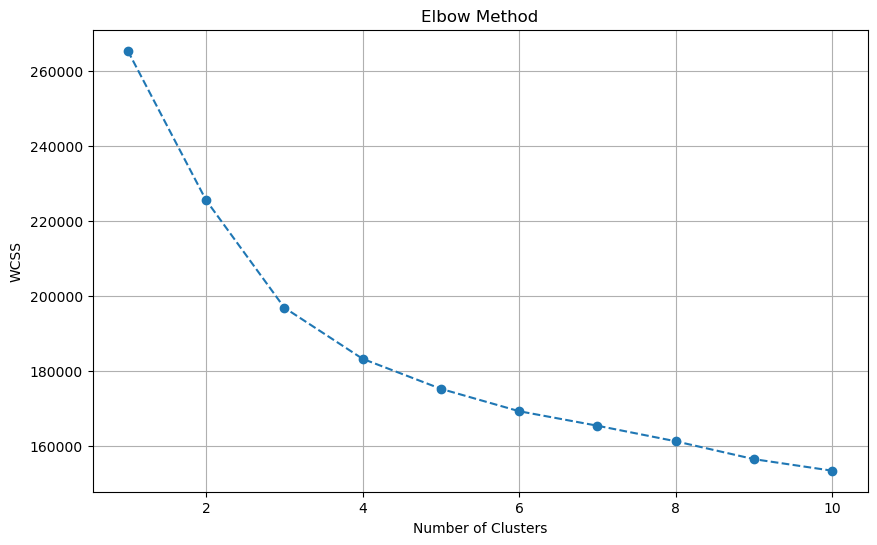

In [23]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determine the optimal number of clusters using the Elbow Method
wcss = []
max_clusters = 10
for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

# Plotting the WCSS values
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_clusters + 1), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

/Users/victoralvarez/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


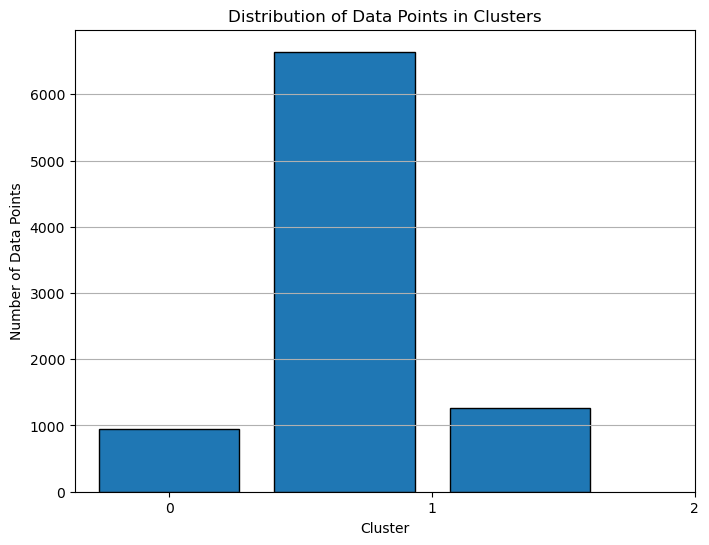

In [24]:
# Apply K-means clustering with 3 clusters
kmeans_3 = KMeans(n_clusters=3, init='k-means++', random_state=42)
cluster_assignments = kmeans_3.fit_predict(X_train)

# Visualize the distribution of data points in each cluster
plt.figure(figsize=(8, 6))
plt.hist(cluster_assignments, bins=3, edgecolor='black', rwidth=0.8, align='left')
plt.title('Distribution of Data Points in Clusters')
plt.xlabel('Cluster')
plt.ylabel('Number of Data Points')
plt.xticks(range(3))
plt.grid(axis='y')
plt.show()

In [25]:
# Defining the column names for the dataset
column_names = [
    'having_IP_Address', 'URL_Length', 'Shortining_Service', 'having_At_Symbol', 'double_slash_redirecting',
    'Prefix_Suffix', 'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length', 'Favicon',
    'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor', 'Links_in_tags',
    'SFH', 'Submitting_to_email', 'Abnormal_URL', 'Redirect', 'on_mouseover',
    'RightClick', 'popUpWidnow', 'Iframe', 'age_of_domain', 'DNSRecord',
    'web_traffic', 'Page_Rank', 'Google_Index', 'Links_pointing_to_page', 'Statistical_report',
    'Result'
]

# Assigning column names to the dataset
data.columns = column_names

# Replacing -1 with 0 for binary classification
data = data.replace({-1: 0})

# Splitting the dataset into training and testing sets
X = data.drop('Result', axis=1)
y = data['Result']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the data
scaler = StandardScaler()
X_train_preprocessed = scaler.fit_transform(X_train)
X_test_preprocessed = scaler.transform(X_test)

X_train_preprocessed.shape, X_test_preprocessed.shape

((8844, 30), (2211, 30))

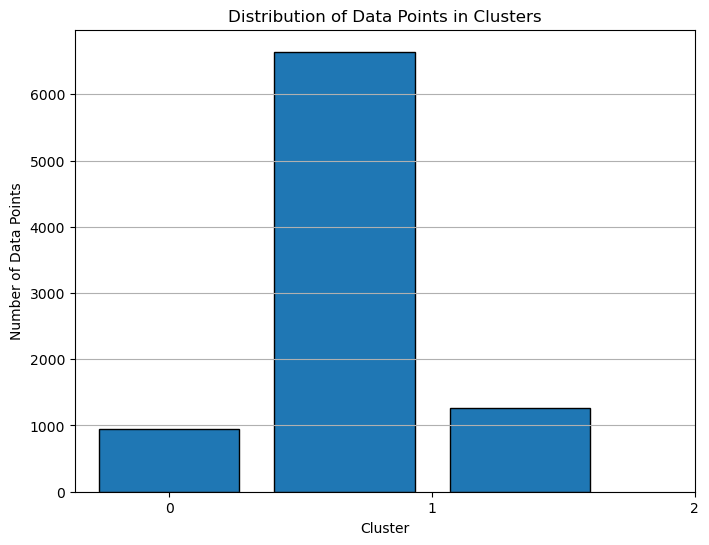

In [26]:
import matplotlib.pyplot as plt

# Visualize the distribution of data points in each cluster
plt.figure(figsize=(8, 6))
plt.hist(cluster_assignments, bins=3, edgecolor='black', rwidth=0.8, align='left')
plt.title('Distribution of Data Points in Clusters')
plt.xlabel('Cluster')
plt.ylabel('Number of Data Points')
plt.xticks(range(3))
plt.grid(axis='y')
plt.show()